<a href="https://colab.research.google.com/github/AndresRestrepoRodriguez/forecasting_occupancy/blob/main/EDA_Occupancy_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

## Imports

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns

## Read data

In [2]:
file_path = '/content/device_activations.csv'
data = pd.read_csv(file_path)

## Descriptive Analysis

In [3]:
data.describe()

,device_activated
count,9045.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [4]:
data.dtypes

time                object
device              object
device_activated     int64
dtype: object

In [5]:
data.duplicated().sum()

54

In [6]:
data[data.duplicated()].head()

,time,device,device_activated
34,2022-07-01 08:14:17,device_2,1
166,2022-07-04 10:42:14,device_2,1
456,2022-07-05 15:42:55,device_2,1
1006,2022-07-07 14:07:24,device_2,1
1093,2022-07-08 07:23:43,device_2,1


In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data['time'].unique(), data['device'].unique(), data['device_activated'].unique()

(array(['2022-07-01 04:23:32', '2022-07-01 06:52:57',
        '2022-07-01 06:53:00', ..., '2022-08-31 17:34:42',
        '2022-08-31 17:40:03', '2022-08-31 17:50:03'], dtype=object),
 array(['device_6', 'device_2', 'device_4', 'device_3', 'device_5',
        'device_7', 'device_1'], dtype=object),
 array([1]))

In [9]:
data.isnull().sum()

time                0
device              0
device_activated    0
dtype: int64

In [10]:
fig = px.bar(data, x='device', y='device_activated')
fig.show()

## Analysis after Transformation

Data transformation

1. Convert time to datatetime
2. Sum activated by hours and date

In [11]:
data['time']= pd.to_datetime(data['time'])
data = data.set_index(pd.DatetimeIndex(data['time']))
data

,time,device,device_activated
time,,,
2022-07-01 04:23:32,2022-07-01 04:23:32,device_6,1
2022-07-01 06:52:57,2022-07-01 06:52:57,device_2,1
2022-07-01 06:53:00,2022-07-01 06:53:00,device_2,1
2022-07-01 06:56:41,2022-07-01 06:56:41,device_2,1
2022-07-01 07:00:01,2022-07-01 07:00:01,device_6,1
...,...,...,...
2022-08-31 17:26:23,2022-08-31 17:26:23,device_6,1
2022-08-31 17:34:34,2022-08-31 17:34:34,device_4,1
2022-08-31 17:34:42,2022-08-31 17:34:42,device_6,1


In [12]:
data.isnull().sum(), data.dtypes

(time                0
 device              0
 device_activated    0
 dtype: int64,
 time                datetime64[ns]
 device                      object
 device_activated             int64
 dtype: object)

In [13]:
data_grouped_by_device = data.groupby('device').resample("H").sum().reset_index()

<ipython-input-13-0350bd365547>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [14]:
def plot_df(df, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(20,7), dpi=dpi)
    #plt.plot(x, y, color='tab:red')
    new_data.plot()
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

In [15]:
def plot_df_over(df, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(20,7), dpi=dpi)
    for device in df['device'].unique():
      filter_device = df[df['device']==device]
      new_data = filter_device.set_index(pd.DatetimeIndex(filter_device['time']))['device_activated']
    #plt.plot(x, y, color='tab:red')
      new_data.plot(label=device)
    plt.legend()
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

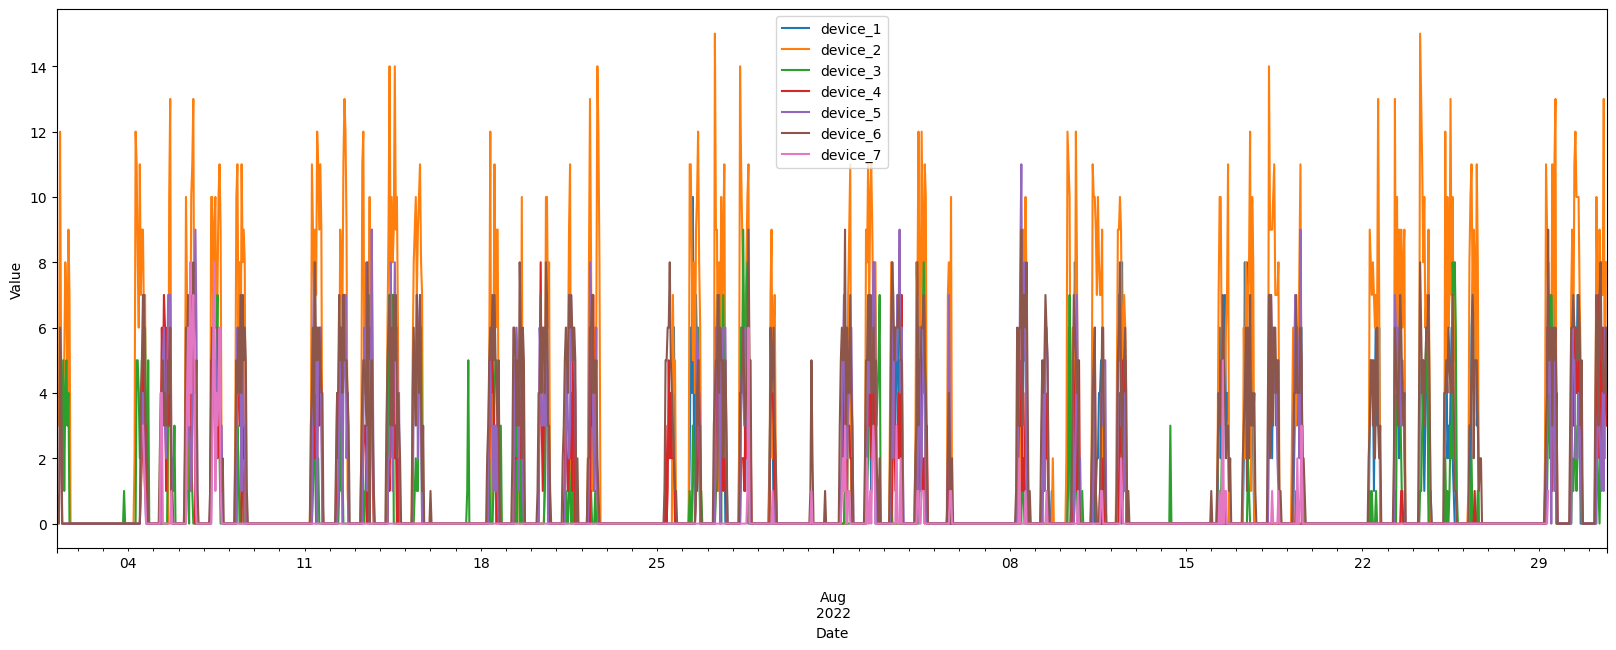

In [16]:
plot_df_over(data_grouped_by_device, title="", xlabel='Date', ylabel='Value', dpi=100)

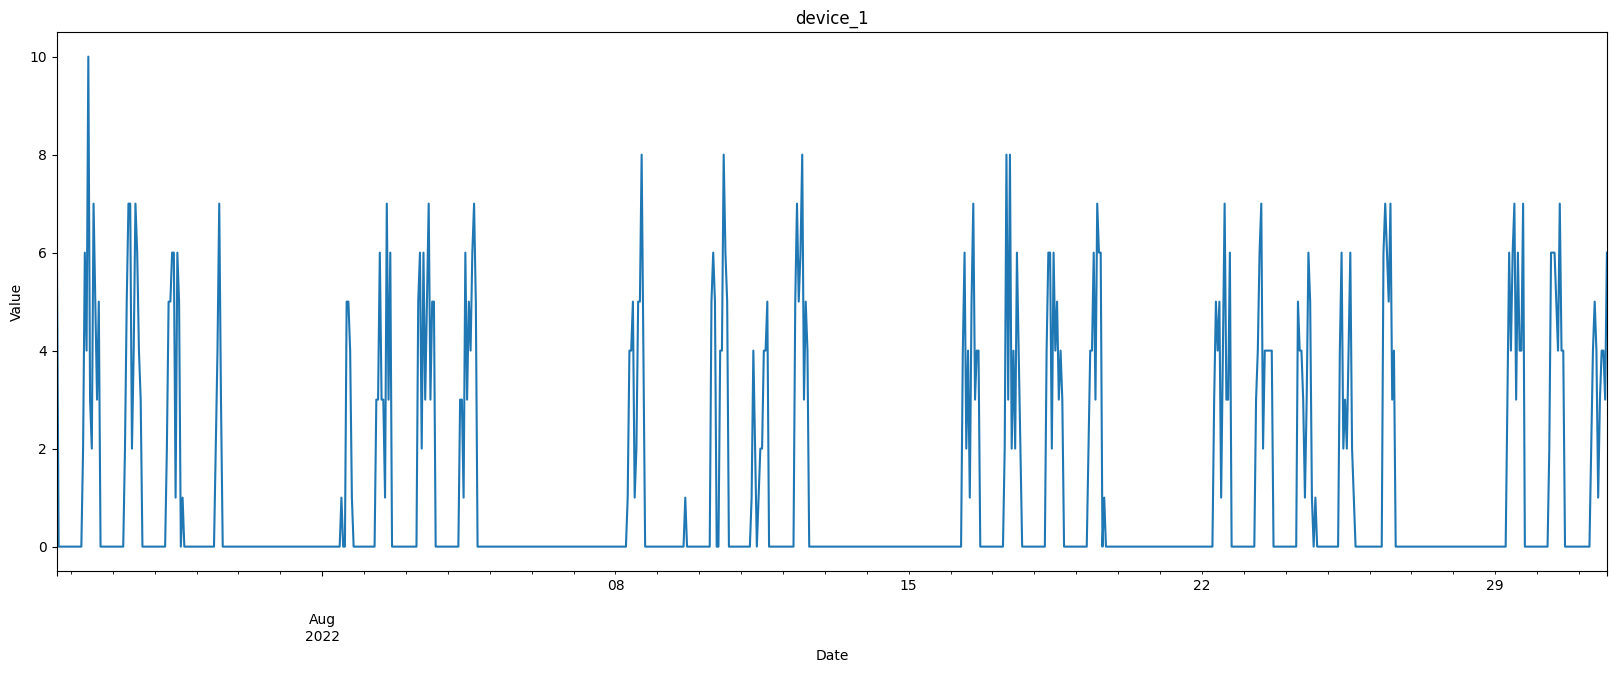

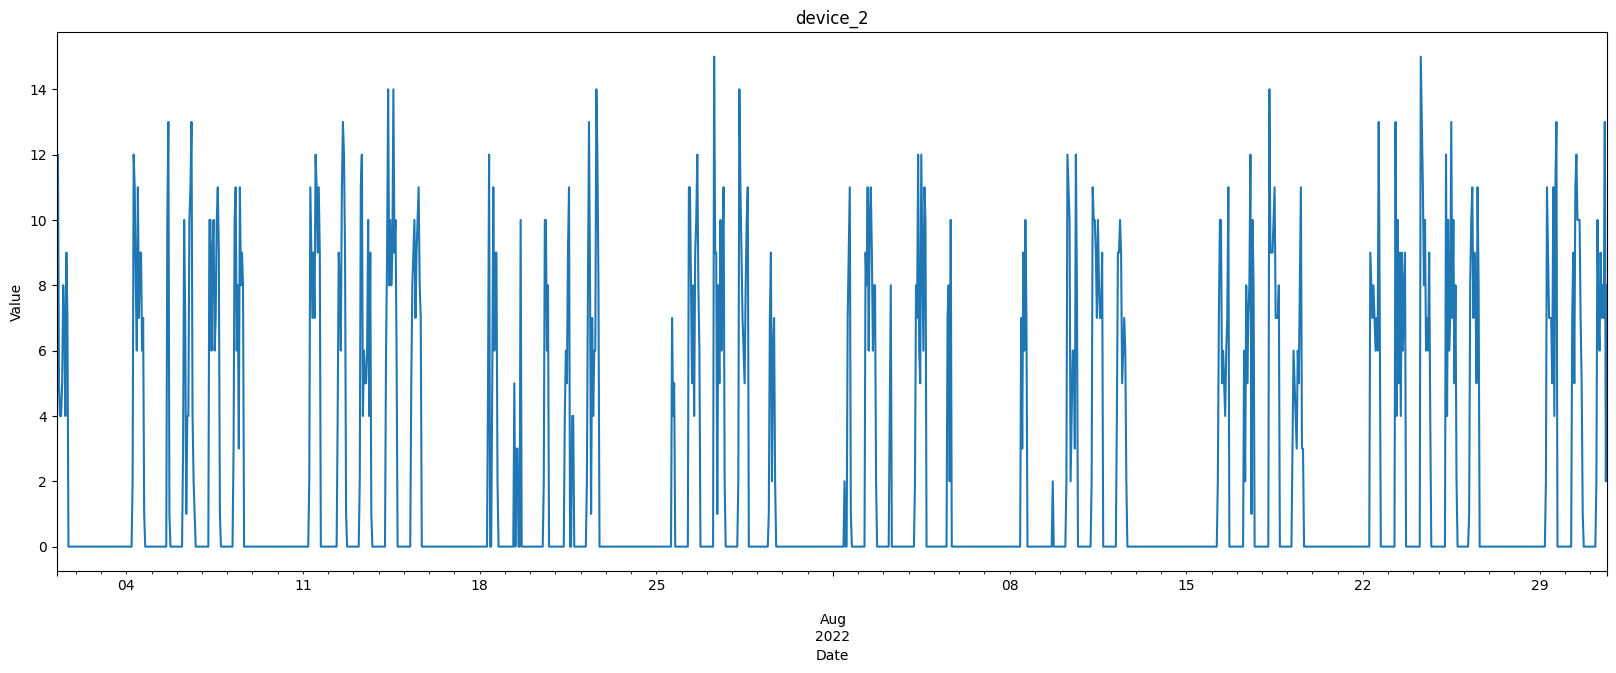

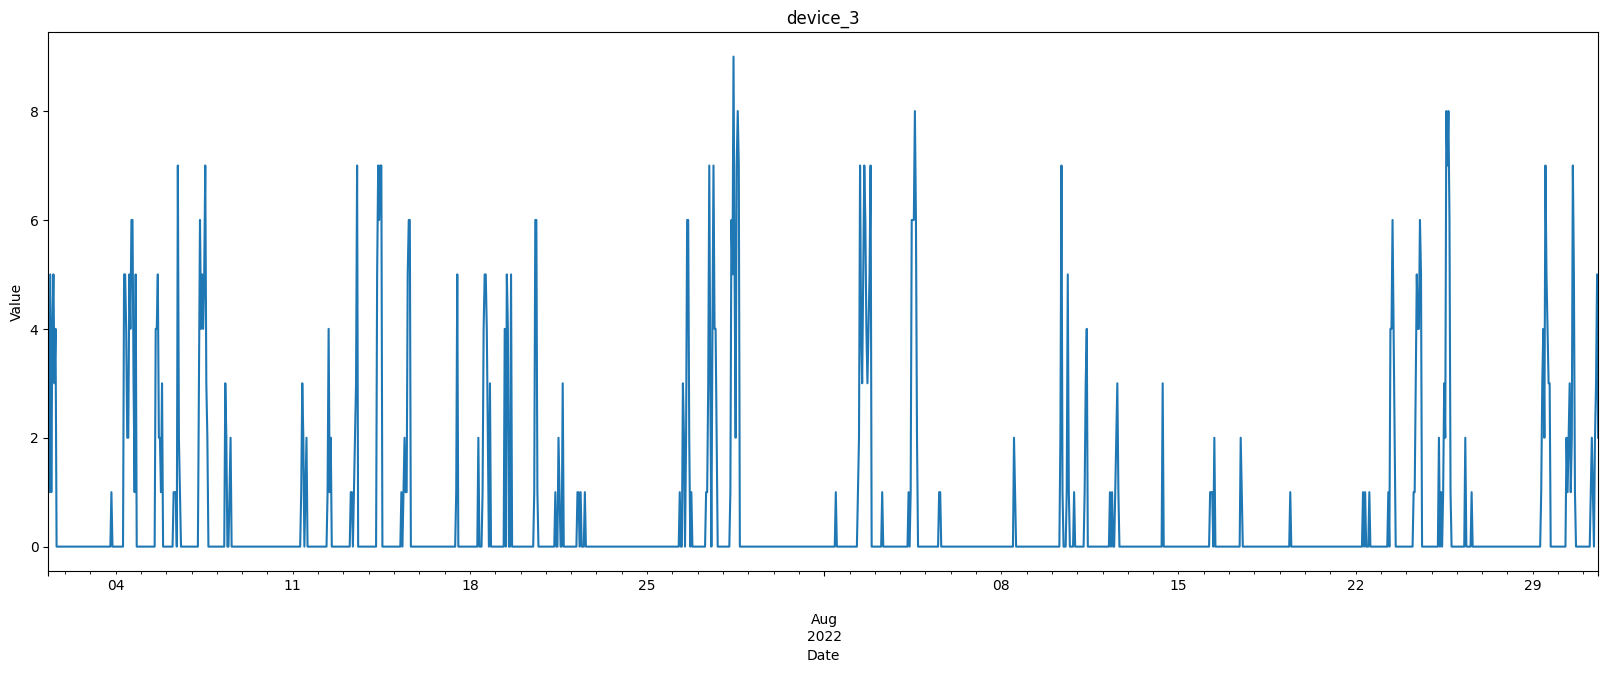

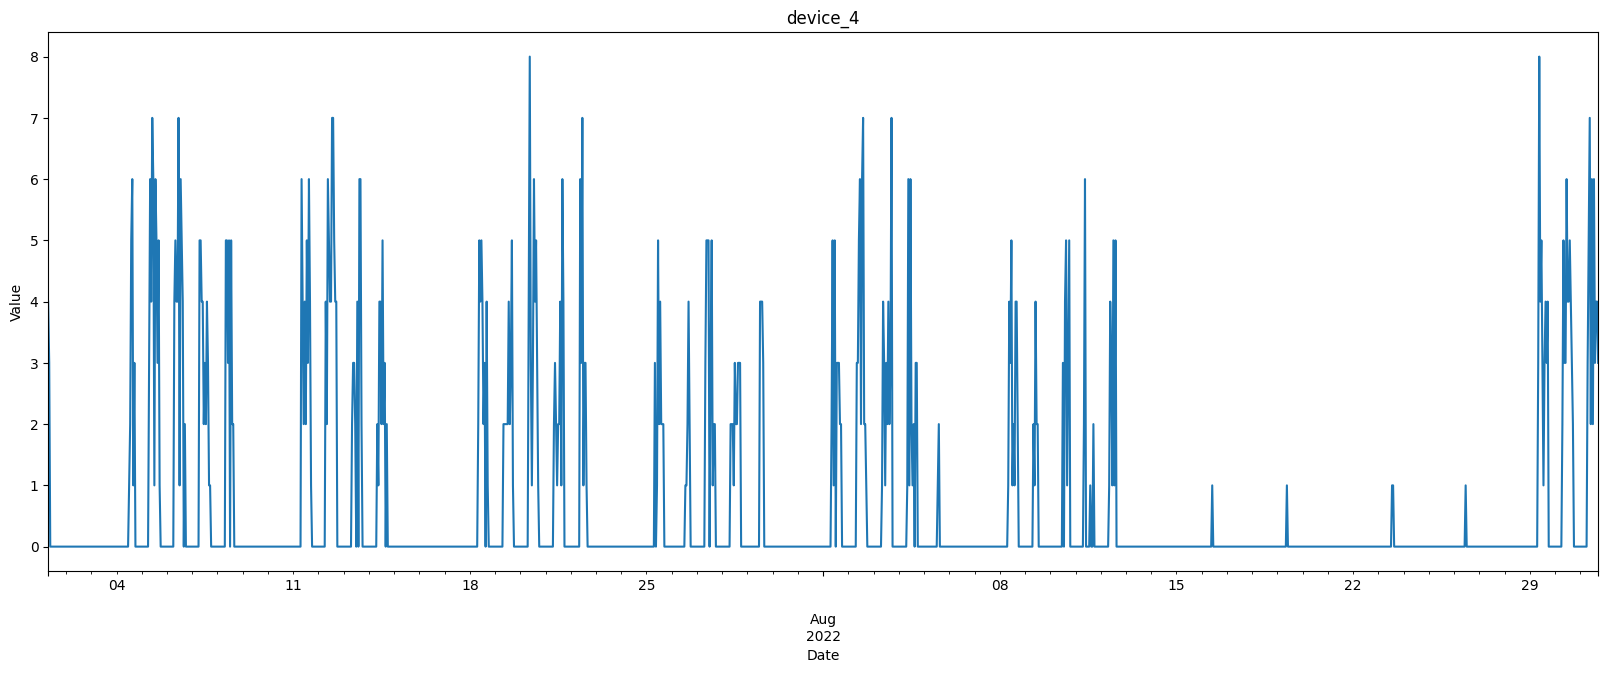

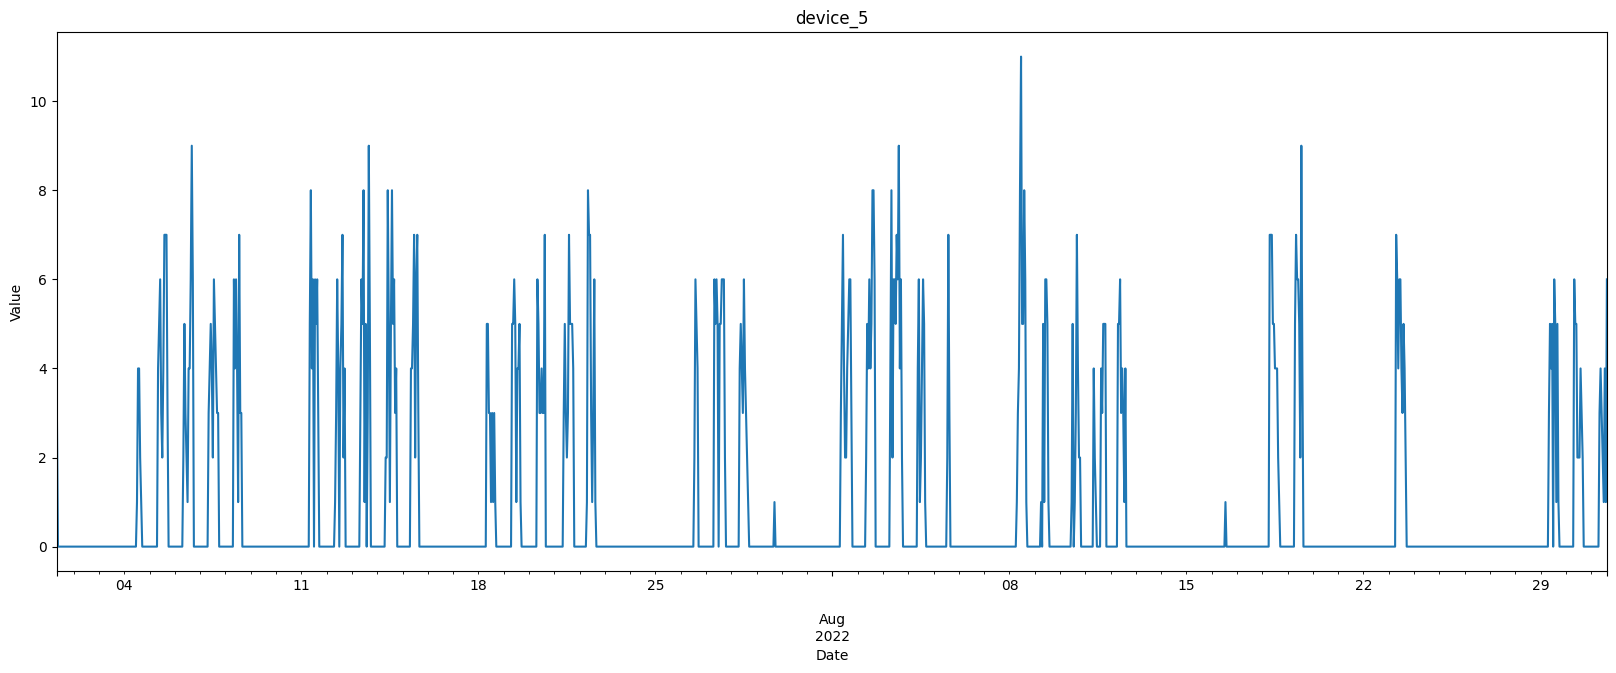

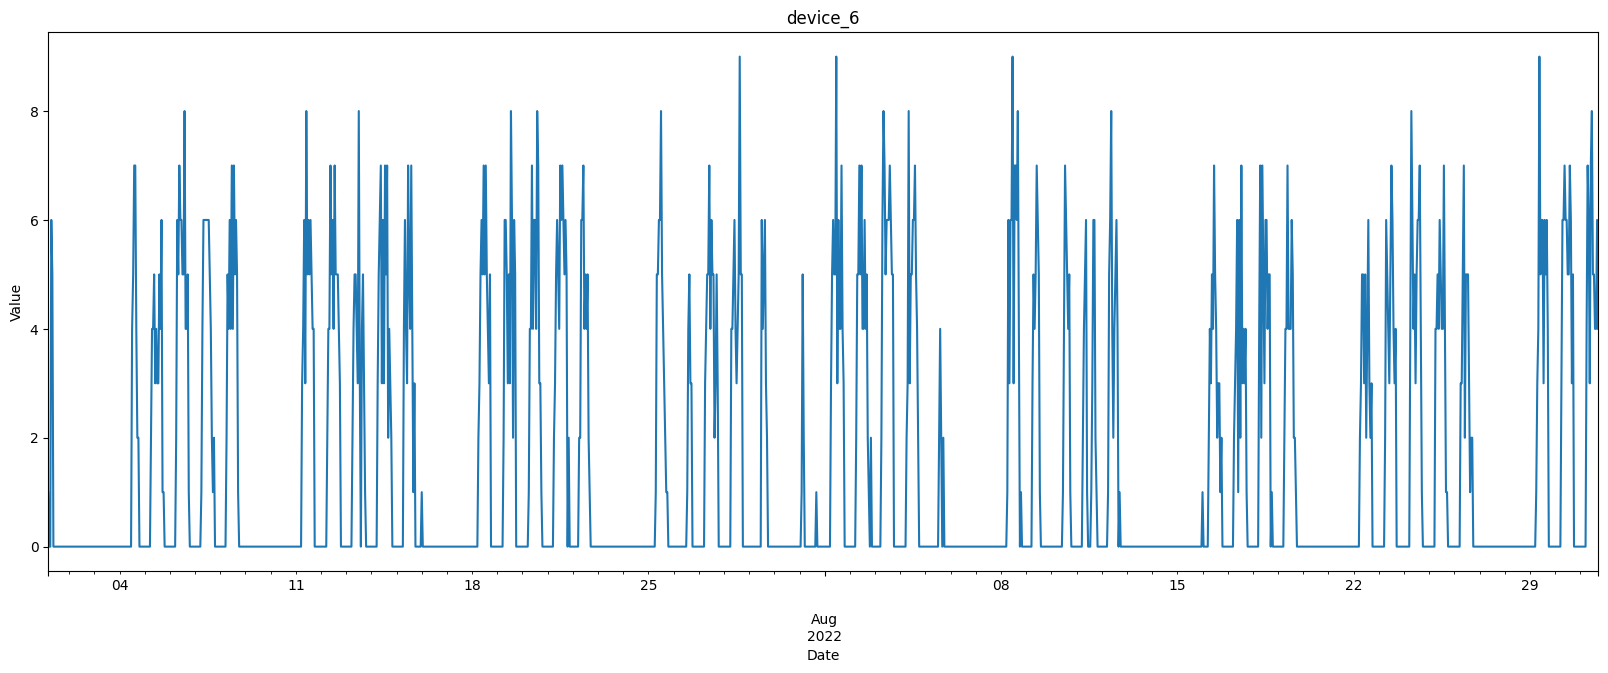

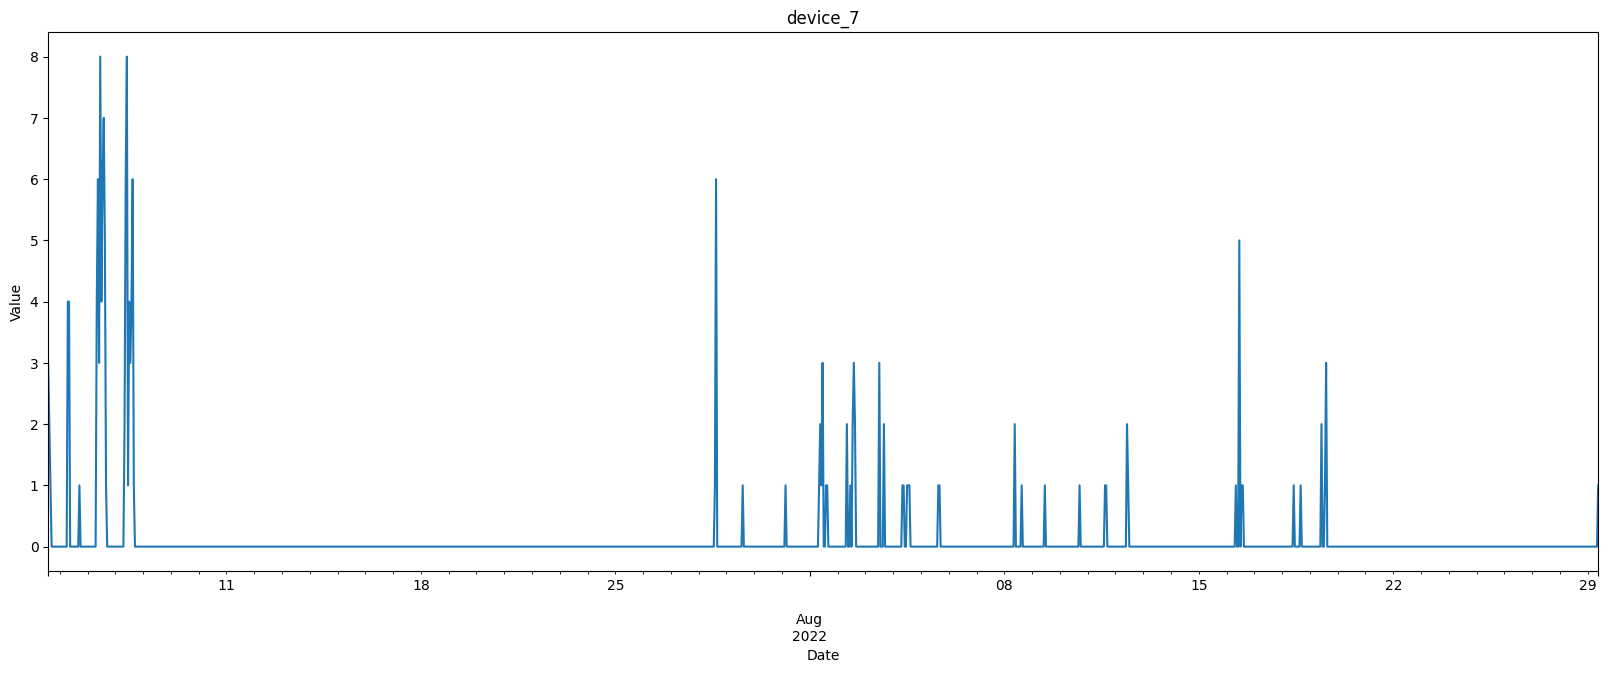

In [17]:
for device in data_grouped_by_device['device'].unique():
  filter_device = data_grouped_by_device[data_grouped_by_device['device']==device]
  new_data = filter_device.set_index(pd.DatetimeIndex(filter_device['time']))['device_activated']
  plot_df(new_data, title=device)



Check Imbalance

Device: device_1


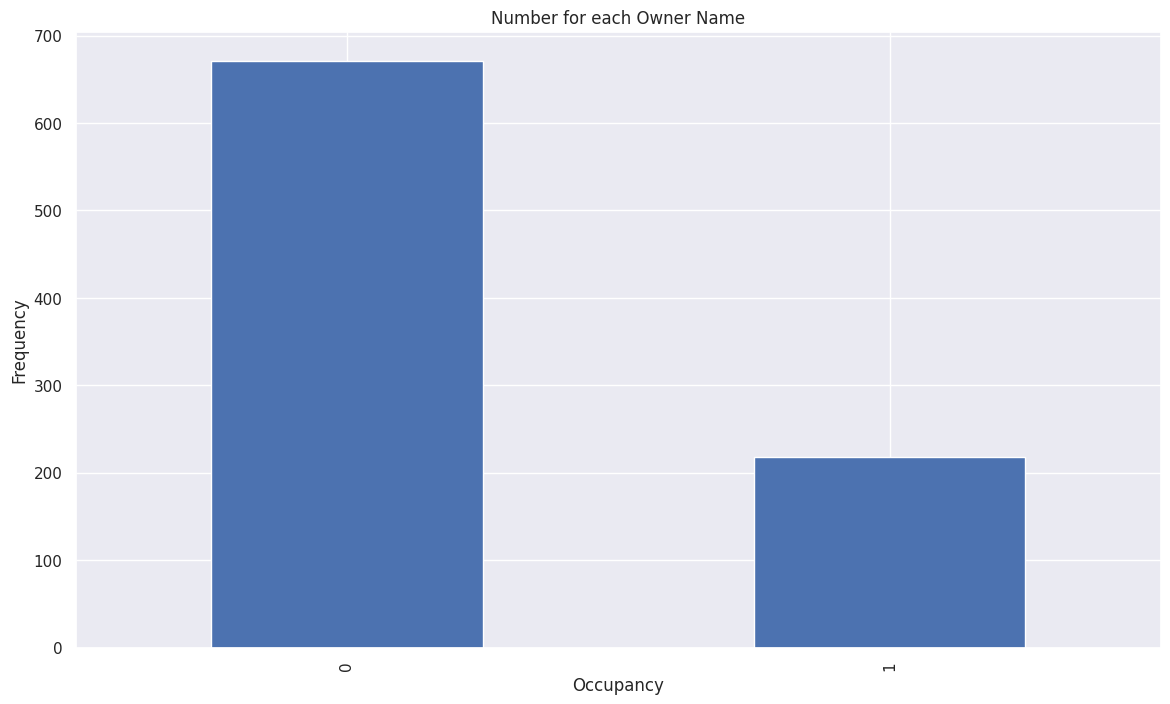

Device: device_2


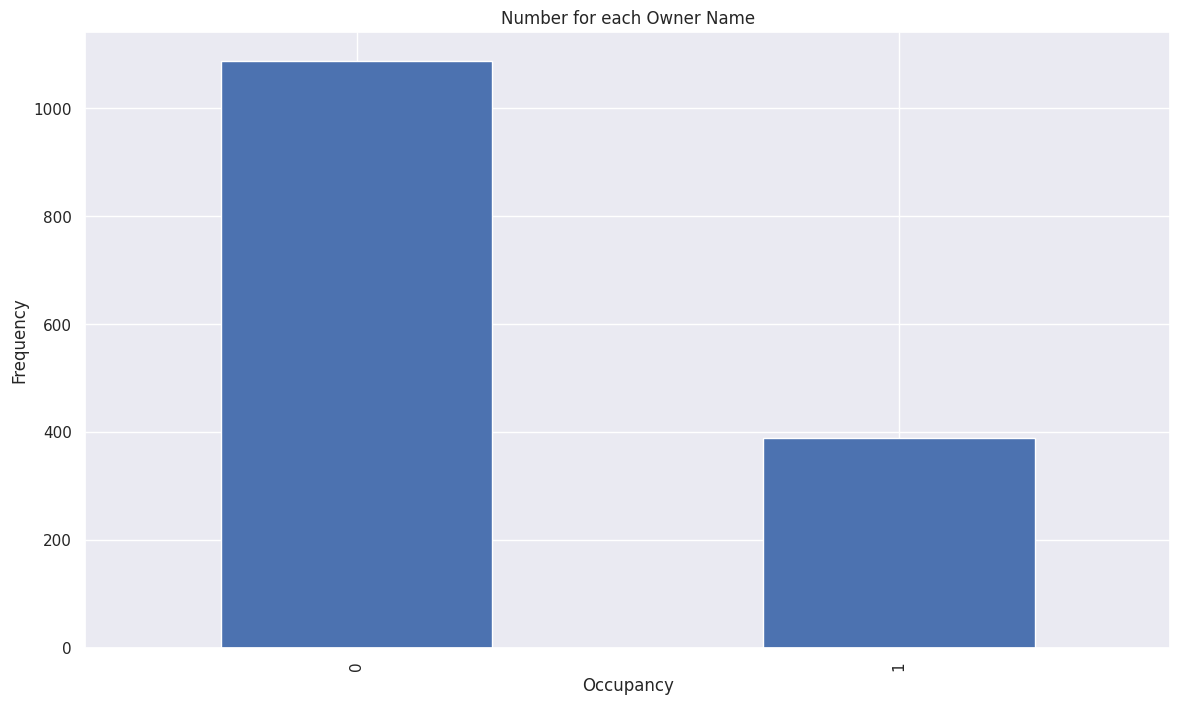

Device: device_3


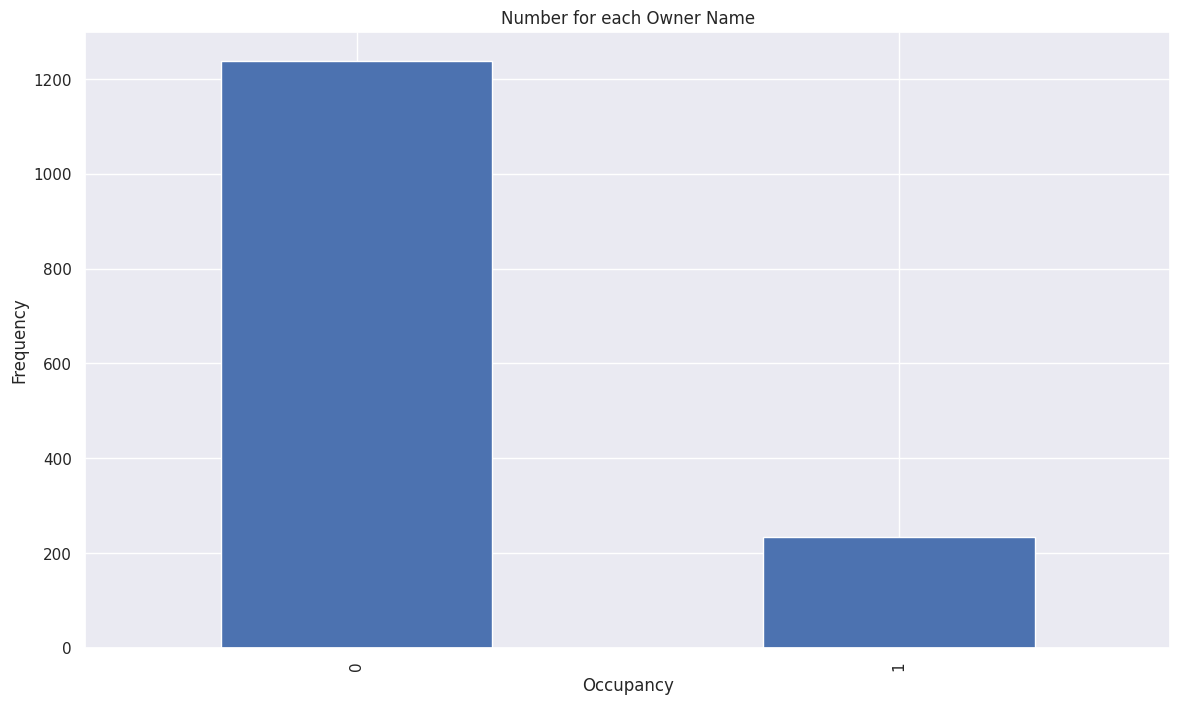

Device: device_4


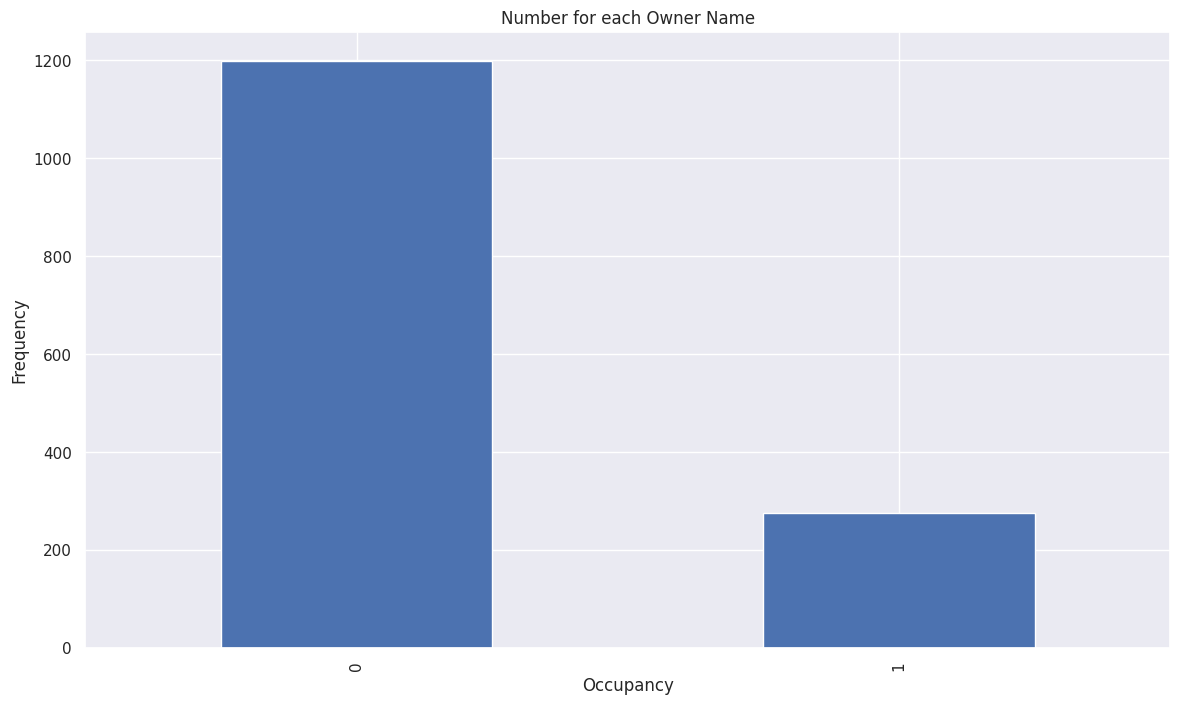

Device: device_5


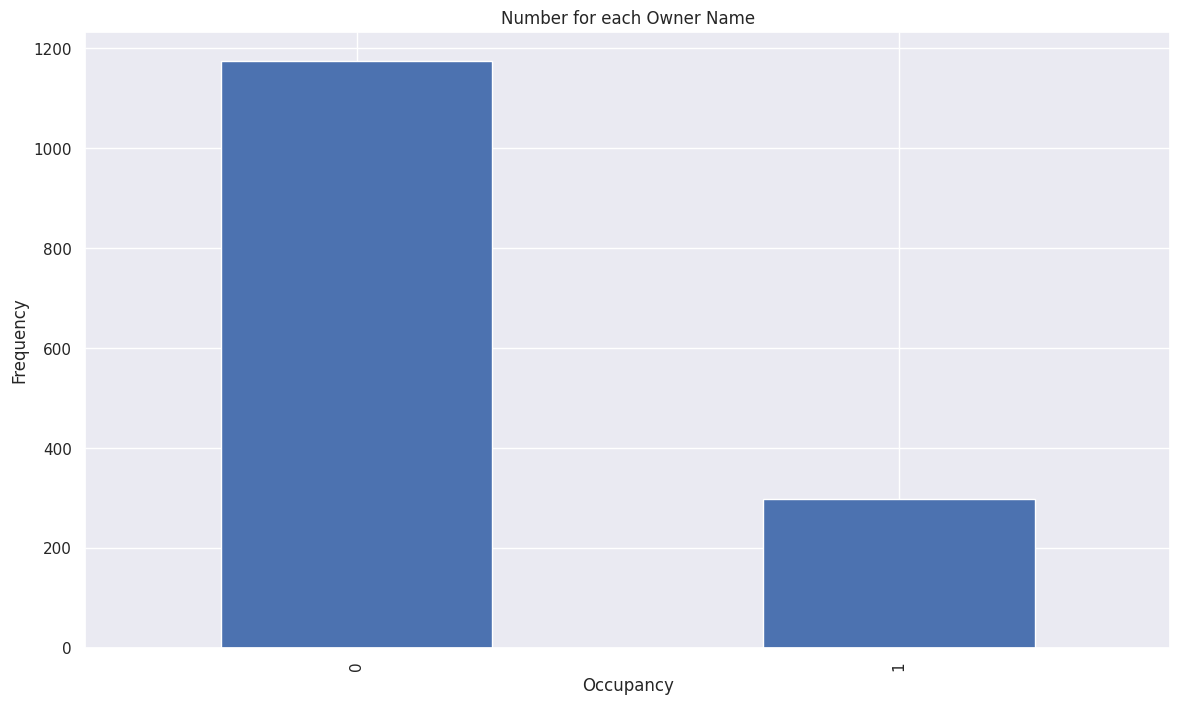

Device: device_6


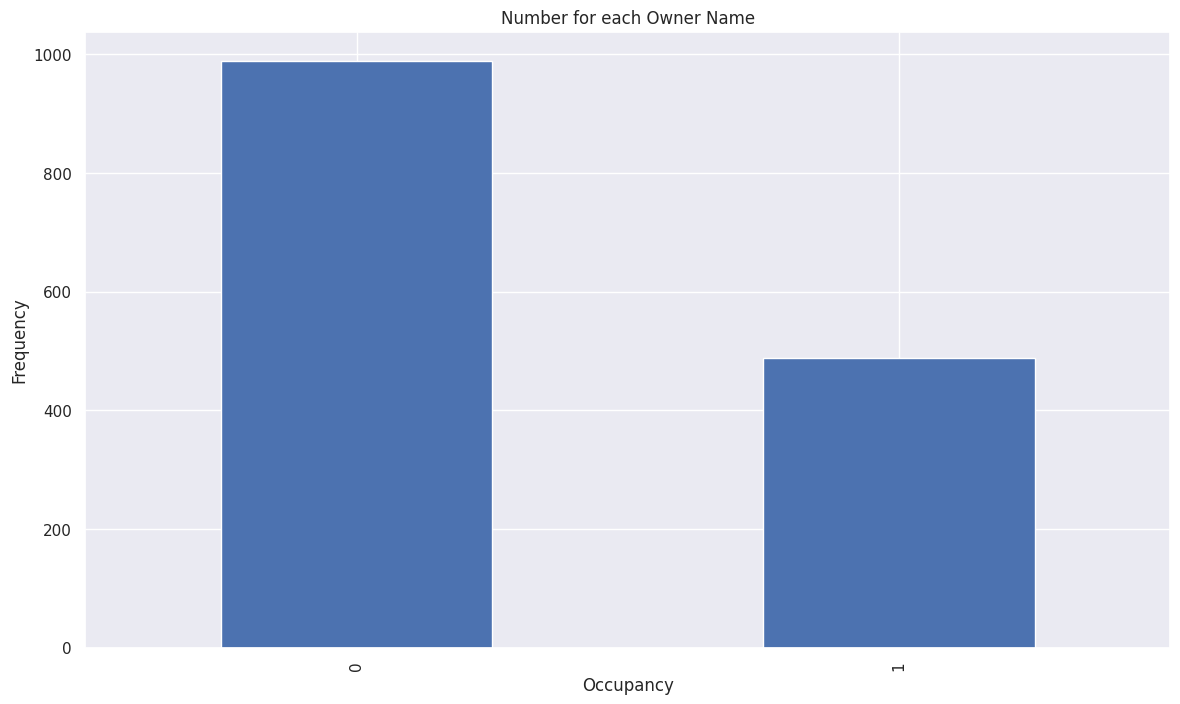

Device: device_7


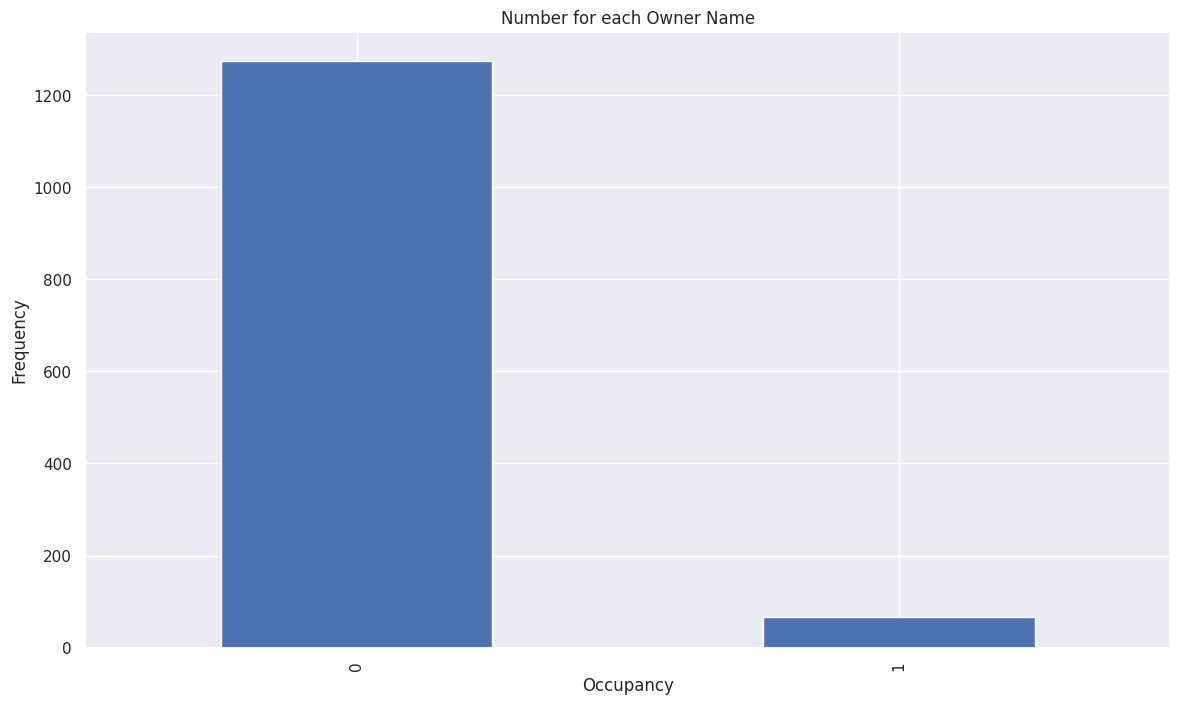

In [18]:
sns.set(style="darkgrid")
titanic = sns.load_dataset("titanic")

data_grouped_by_device['binary_detection'] = data_grouped_by_device['device_activated'].apply(lambda x: '1' if x >= 1 else '0')
for device in data_grouped_by_device['device'].unique():
  print(f"Device: {device}")
  filter_device = data_grouped_by_device[data_grouped_by_device['device']==device]
  ax = filter_device['binary_detection'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each Owner Name")
  ax.set_xlabel("Occupancy")
  ax.set_ylabel("Frequency")
  plt.show()

## Stationary test: Dickey_fuller


In [19]:
for device in data_grouped_by_device['device'].unique():
  print(f"Device: {device}")
  filter_device = data_grouped_by_device[data_grouped_by_device['device']==device]
  new_data = filter_device.set_index(pd.DatetimeIndex(filter_device['time']))['device_activated']
  # extracting only the passengers count using values function
  values = new_data.values

  # passing the extracted passengers count to adfuller function.
  # result of adfuller function is stored in a res variable
  res = adfuller(values)

  # Printing the statistical result of the adfuller test
  print('Augmneted Dickey_fuller Statistic: %f' % res[0])
  print('p-value: %f' % res[1])
  stationary = 'stationary' if res[1] <= 0.05 else 'non-stationary'
  print(f'results: {stationary}')

  # printing the critical values at different alpha levels.
  print('critical values at different levels:')
  for k, v in res[4].items():
      print('\t%s: %.3f' % (k, v))

Device: device_1
Augmneted Dickey_fuller Statistic: -4.077191
p-value: 0.001056
results: stationary
critical values at different levels:
	1%: -3.438
	5%: -2.865
	10%: -2.569
Device: device_2
Augmneted Dickey_fuller Statistic: -4.832344
p-value: 0.000047
results: stationary
critical values at different levels:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Device: device_3
Augmneted Dickey_fuller Statistic: -5.378762
p-value: 0.000004
results: stationary
critical values at different levels:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Device: device_4
Augmneted Dickey_fuller Statistic: -3.054702
p-value: 0.030092
results: stationary
critical values at different levels:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Device: device_5
Augmneted Dickey_fuller Statistic: -4.171108
p-value: 0.000737
results: stationary
critical values at different levels:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Device: device_6
Augmneted Dickey_fuller Statistic: -4.136490
p-value: 0.000842
results: stationary
critical values at different l

All the time series are stationary.